In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

## Bitcoin: Asset Classification and Price Predictions for 2021

In [2]:
dfbit=pd.read_json('https://api.coindesk.com/v1/bpi/historical/close.json?start=2013-09-01&end='+str(date.today())).iloc[:-2]
dfbit=dfbit.reset_index()
dfbit.columns=['Date', 'bpi', 'disclaimer', 'time']
dfbit=dfbit.set_index('Date')
dfbit=dfbit[['bpi']]
dfbit.tail()

,bpi
Date,
2020-12-03,19450.2667
2020-12-04,18657.4200
2020-12-05,19157.9250
2020-12-06,19386.7117
2020-12-07,19185.3967


In [3]:
dfbitchange=dfbit
dfbitchange['logbpi']=np.log(dfbitchange['bpi'])

dfbitchange['percent_daily']=dfbitchange['bpi'].pct_change(periods=1)
dfbitchange['percent_daily_log']=np.log(dfbitchange['bpi']).pct_change(periods=1)
dfbitchange['daily_diff']=dfbitchange['bpi'].diff(1)
dfbitchange['daily_log_diff']=np.log(dfbitchange['bpi']).diff(1)
dfbitchange['volofvol_daily']=dfbitchange['percent_daily'].diff(1)

dfbitchange['percent_weekly']=dfbitchange['bpi'].pct_change(periods=7)
dfbitchange['percent_weekly_log']=np.log(dfbitchange['bpi']).pct_change(periods=7)
dfbitchange['weekly_diff']=dfbitchange['bpi'].diff(7)
dfbitchange['weekly_log_diff']=np.log(dfbitchange['bpi']).diff(7)
dfbitchange['volofvol_weekly']=dfbitchange['percent_weekly'].diff(1)


dfbitchange['percent_bimonthly']=dfbitchange['bpi'].pct_change(periods=14)
dfbitchange['percent_bimonthly_log']=np.log(dfbitchange['bpi']).pct_change(periods=14)
dfbitchange['bimonthly_diff']=dfbitchange['bpi'].diff(14)
dfbitchange['bimonthly_log_diff']=np.log(dfbitchange['bpi']).diff(14)
dfbitchange['volofvol_bimonthly']=dfbitchange['percent_bimonthly'].diff(1)


dfbitchange['percent_30Days']=dfbitchange['bpi'].pct_change(periods=30)
dfbitchange['percent_30Days_log']=np.log(dfbitchange['bpi']).pct_change(periods=30)
dfbitchange['30Days_diff']=dfbitchange['bpi'].diff(30)
dfbitchange['30Days_log_diff']=np.log(dfbitchange['bpi']).diff(30)
dfbitchange['volofvol_30Days']=dfbitchange['percent_30Days'].diff(1)


dfbitchange['percent_60Days']=dfbitchange['bpi'].pct_change(periods=60)
dfbitchange['percent_60Days_log']=np.log(dfbitchange['bpi']).pct_change(periods=60)
dfbitchange['60Days_diff']=dfbitchange['bpi'].diff(60)
dfbitchange['60Days_log_diff']=np.log(dfbitchange['bpi']).diff(60)
dfbitchange['volofvol_60Days']=dfbitchange['percent_60Days'].diff(1)


dfbitchange['percent_90Days']=dfbitchange['bpi'].pct_change(periods=90)
dfbitchange['percent_90Days_log']=np.log(dfbitchange['bpi']).pct_change(periods=90)
dfbitchange['90Days_diff']=dfbitchange['bpi'].diff(90)
dfbitchange['90Days_log_diff']=np.log(dfbitchange['bpi']).diff(90)
dfbitchange['volofvol_90Days']=dfbitchange['percent_90Days'].pct_change(1)

dfbitchange['percent_180Days']=dfbitchange['bpi'].pct_change(periods=180)
dfbitchange['percent_180Days_log']=np.log(dfbitchange['bpi']).pct_change(periods=180)
dfbitchange['180Days_diff']=dfbitchange['bpi'].diff(180)
dfbitchange['180Days_log_diff']=np.log(dfbitchange['bpi']).diff(180)
dfbitchange['volofvol_180Days']=dfbitchange['percent_180Days'].pct_change(1)

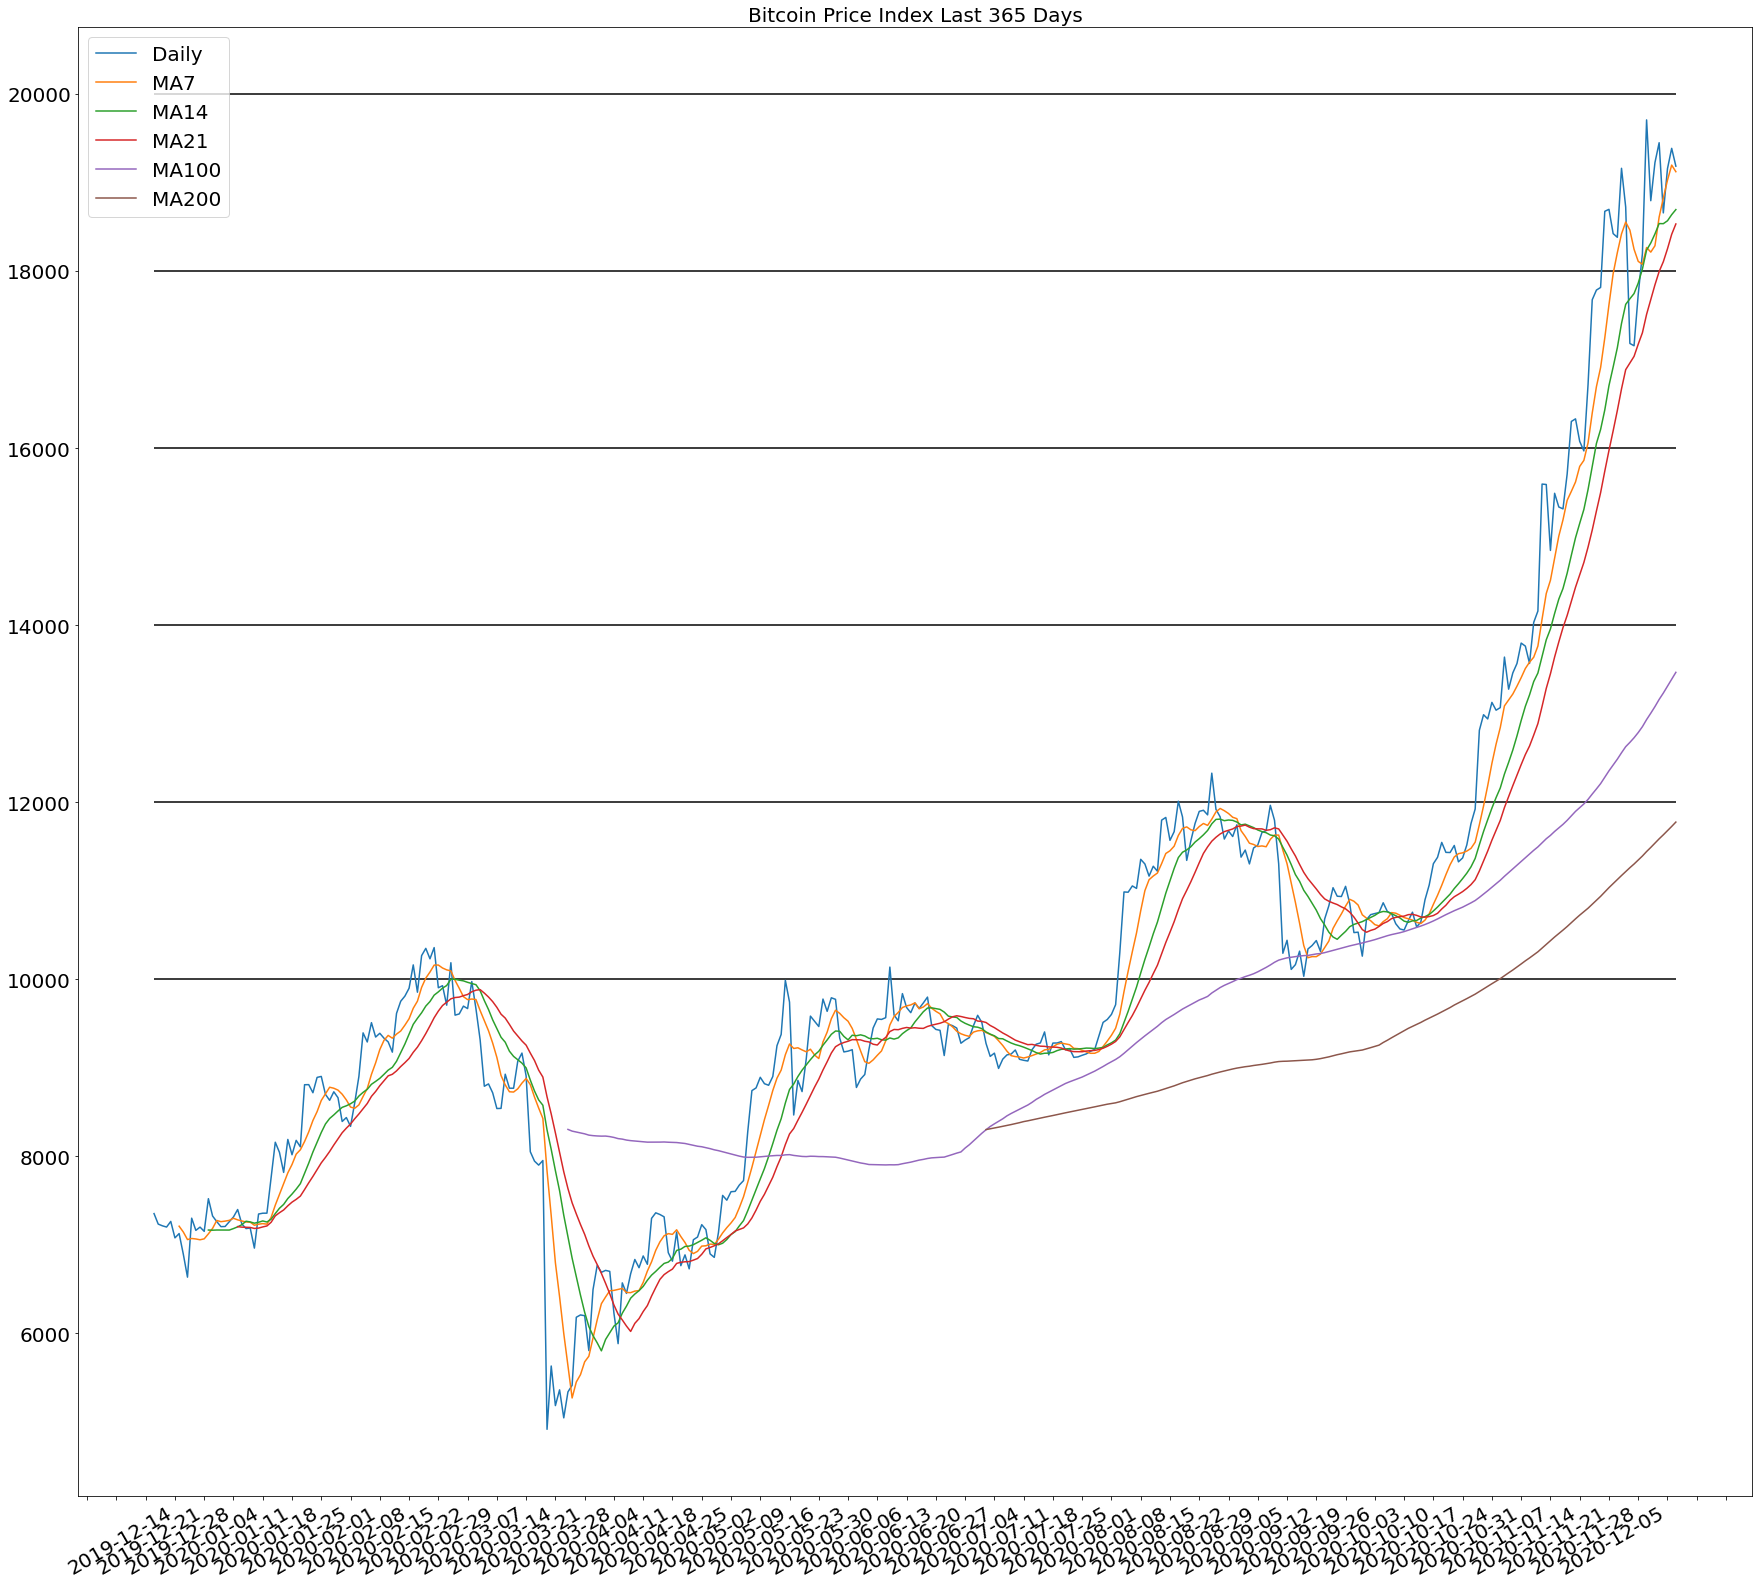

In [4]:
#Weekly moving average plot
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = [30, 30]
fig, ax = plt.subplots()
ax.plot(dfbit['bpi'].tail(365).index,dfbit['bpi'].tail(365).values,label='Daily')
ax.plot(dfbit['bpi'].tail(365).index,dfbit['bpi'].tail(365).rolling(7).mean().values,label='MA7')
ax.plot(dfbit['bpi'].tail(365).index,dfbit['bpi'].tail(365).rolling(14).mean().values,label='MA14')
ax.plot(dfbit['bpi'].tail(365).index,dfbit['bpi'].tail(365).rolling(21).mean().values,label='MA21')
ax.plot(dfbit['bpi'].tail(365).index,dfbit['bpi'].tail(365).rolling(100).mean().values,label='MA100')
ax.plot(dfbit['bpi'].tail(365).index,dfbit['bpi'].tail(365).rolling(200).mean().values,label='MA200')
ax.hlines(10000,dfbit['bpi'].tail(365).index[0],dfbit['bpi'].tail(365).index[-1],color='k')
ax.hlines(12000,dfbit['bpi'].tail(365).index[0],dfbit['bpi'].tail(365).index[-1],color='k')
ax.hlines(14000,dfbit['bpi'].tail(365).index[0],dfbit['bpi'].tail(365).index[-1],color='k')
ax.hlines(16000,dfbit['bpi'].tail(365).index[0],dfbit['bpi'].tail(365).index[-1],color='k')
ax.hlines(18000,dfbit['bpi'].tail(365).index[0],dfbit['bpi'].tail(365).index[-1],color='k')
ax.hlines(20000,dfbit['bpi'].tail(365).index[0],dfbit['bpi'].tail(365).index[-1],color='k')
plt.legend(loc="upper left")
plt.legend(fontsize=20) 
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('Bitcoin Price Index Last 365 Days',fontsize=20)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
fig.autofmt_xdate()
plt.show()


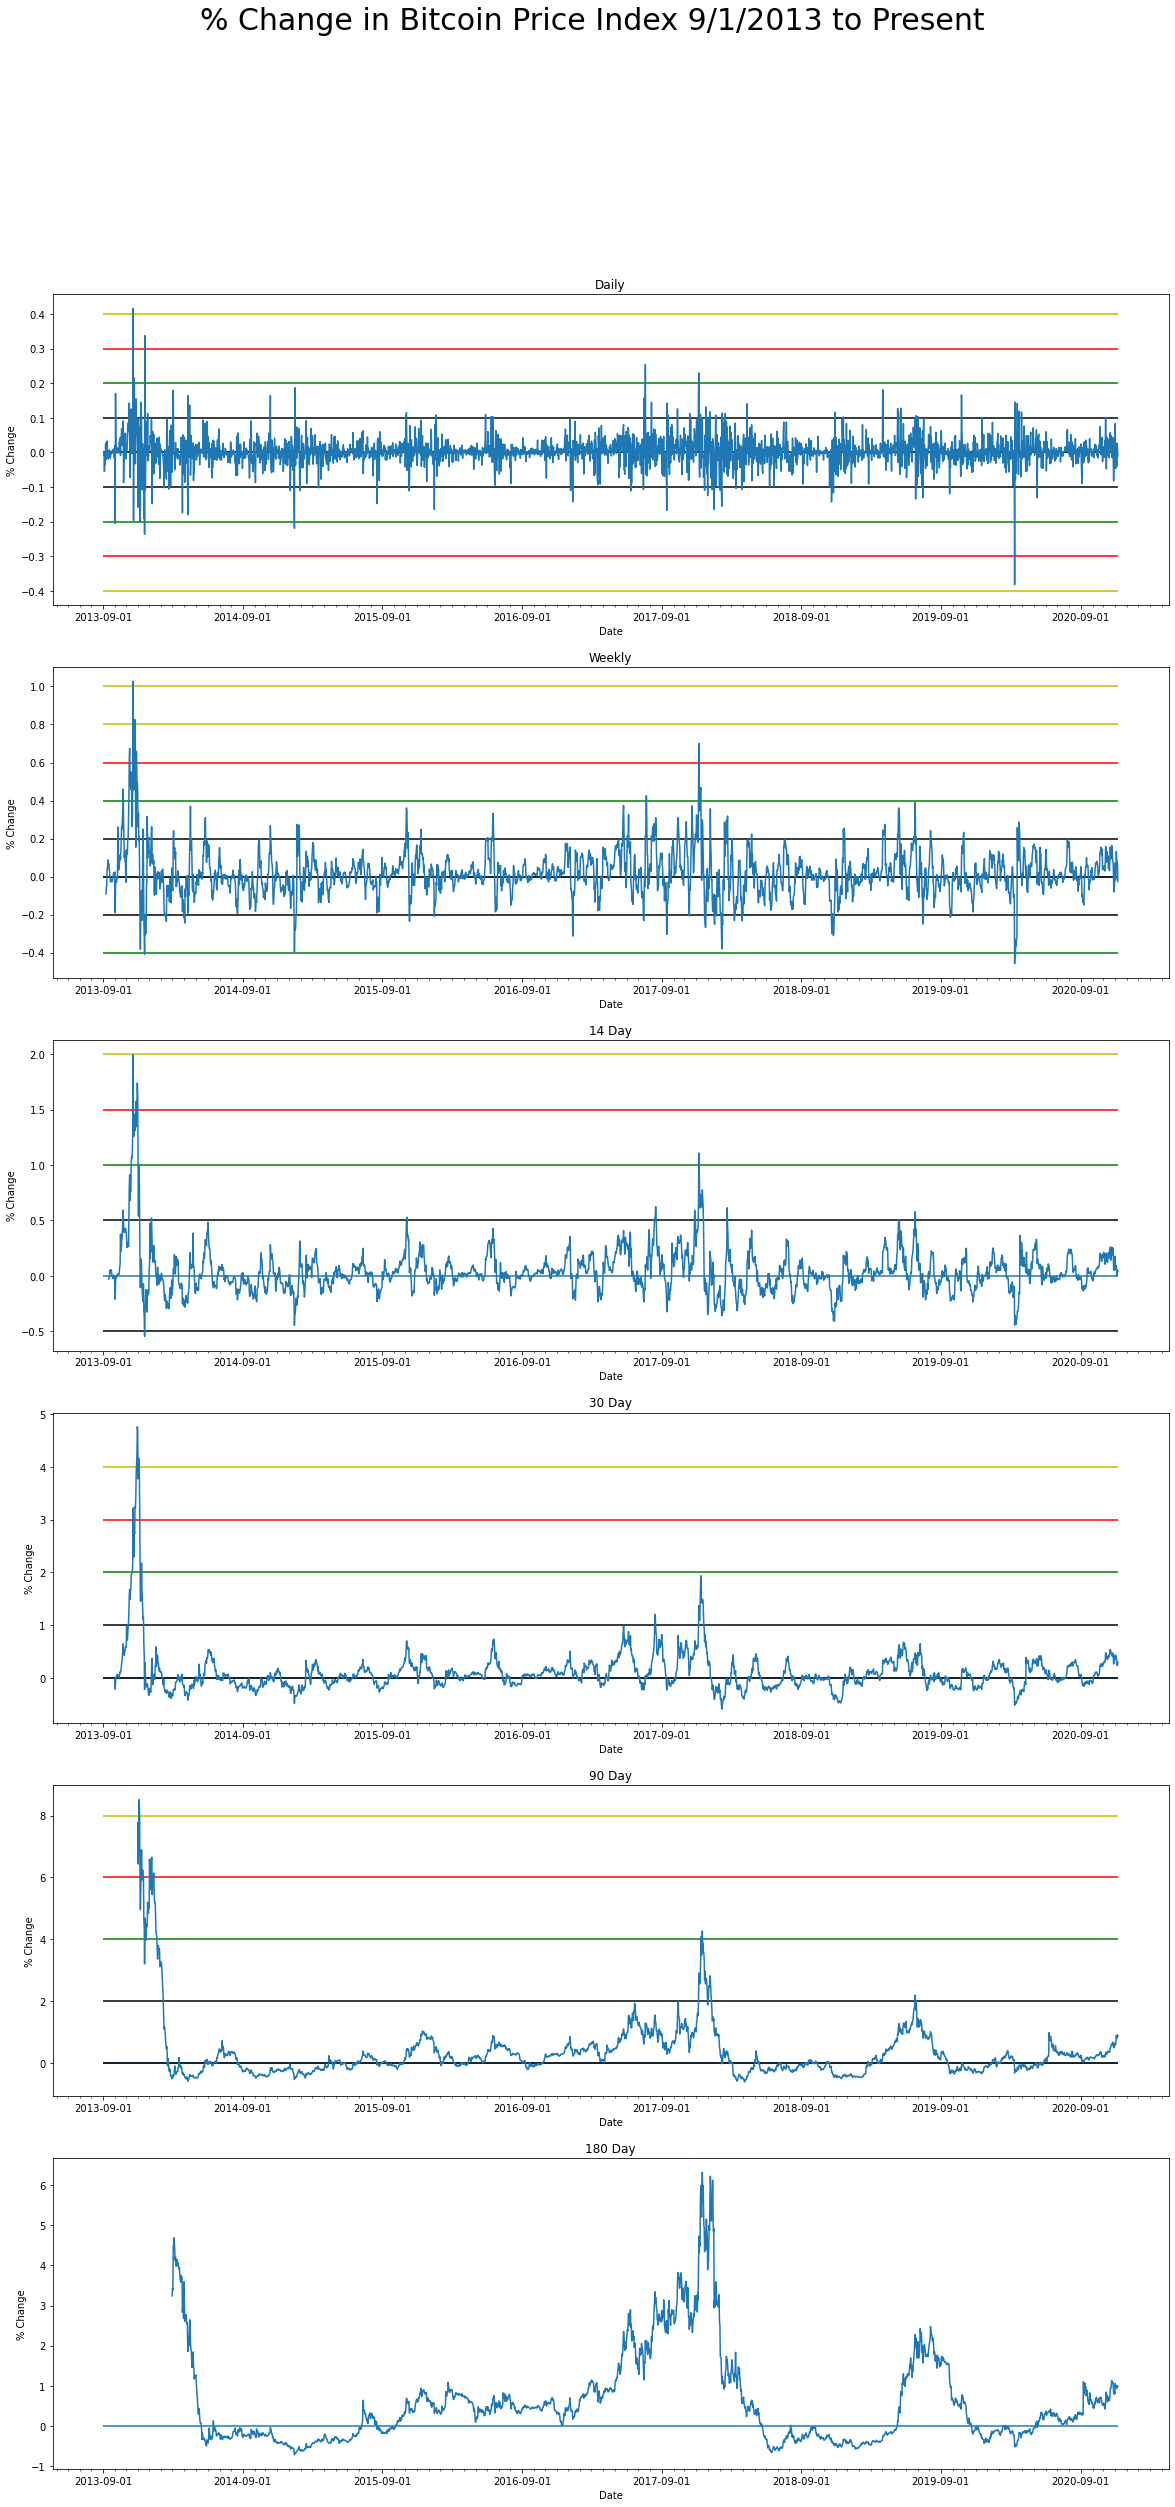

In [5]:
rangecrash=dfbitchange['percent_daily'].loc[:].index
valuescrash=dfbitchange['percent_daily'].loc[:].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(6)
fig.suptitle('% Change in Bitcoin Price Index 9/1/2013 to Present',fontsize=30)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1])
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.3,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(.4,rangecrash[0],rangecrash[-1],color='y')
axs[0].hlines(-.1,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-.2,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(-.3,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(-.4,rangecrash[0],rangecrash[-1],color='y')
axs[0].title.set_text('Daily')
axs[0].set_ylabel('% Change')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['percent_weekly'].loc[:].index
valuescrash=dfbitchange['percent_weekly'].loc[:].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.2,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.4,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(.6,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(.8,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(1,rangecrash[0],rangecrash[-1],color='y')
axs[1].hlines(-.2,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(-.4,rangecrash[0],rangecrash[-1],color='g')
axs[1].title.set_text('Weekly')
axs[1].set_ylabel('% Change')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['percent_bimonthly'].loc[:].index
valuescrash=dfbitchange['percent_bimonthly'].loc[:].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1])
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(.5,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(1,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(1.5,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(2,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(-.5,rangecrash[0],rangecrash[-1],color='k')
axs[2].title.set_text('14 Day')
axs[2].set_ylabel('% Change')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['percent_30Days'].loc[:].index
valuescrash=dfbitchange['percent_30Days'].loc[:].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1])
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(1,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(2,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(3,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(4,rangecrash[0],rangecrash[-1],color='y')
axs[3].title.set_text('30 Day')
axs[3].set_ylabel('% Change')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['percent_90Days'].loc[:].index
valuescrash=dfbitchange['percent_90Days'].loc[:].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(2,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(4,rangecrash[0],rangecrash[-1],color='g')
axs[4].hlines(6,rangecrash[0],rangecrash[-1],color='r')
axs[4].hlines(8,rangecrash[0],rangecrash[-1],color='y')
axs[4].title.set_text('90 Day')
axs[4].set_ylabel('% Change')
axs[4].set_xlabel('Date')

rangecrash=dfbitchange['percent_180Days'].loc[:].index
valuescrash=dfbitchange['percent_180Days'].loc[:].values
axs[5].plot(rangecrash,valuescrash)
axs[5].hlines(0,rangecrash[0],rangecrash[-1])
axs[5].xaxis.set_major_locator(mdates.YearLocator())
axs[5].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[5].title.set_text('180 Day')
axs[5].set_ylabel('% Change')
axs[5].set_xlabel('Date')

plt.show()



## Break

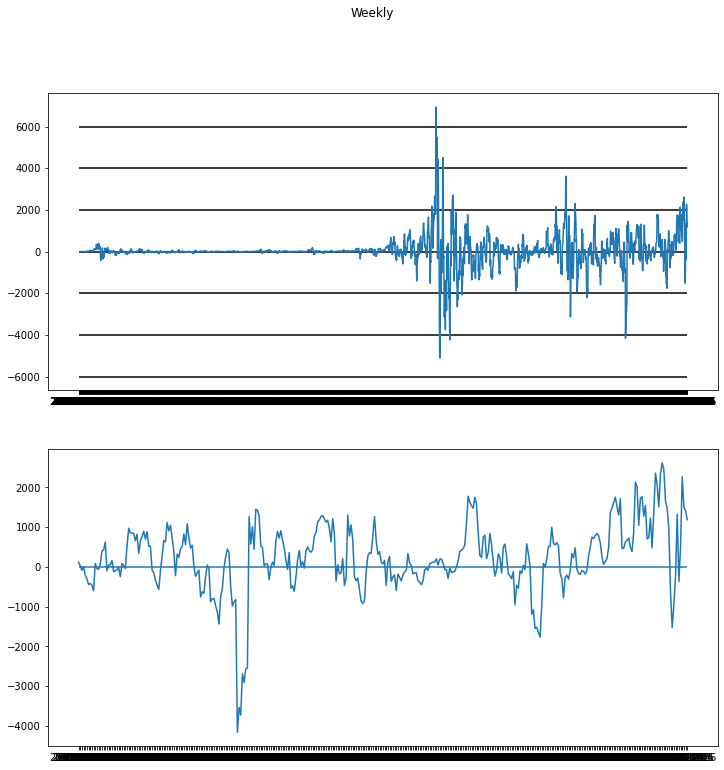

In [6]:
rangenow=dfbitchange['weekly_diff'].tail(365).index
valuesnow=dfbitchange['weekly_diff'].tail(365).values
rangecrash=dfbitchange['weekly_diff'].loc[:].index
valuescrash=dfbitchange['weekly_diff'].loc[:].values
plt.rcParams['figure.figsize'] = [12, 12]
fig,axs=plt.subplots(2)
fig.suptitle('Weekly')
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(2000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(4000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(6000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-2000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-4000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-6000,rangecrash[0],rangecrash[-1],color='k')

axs[1].plot(rangenow,valuesnow)
axs[1].hlines(0,rangenow[0],rangenow[-1])
plt.show()

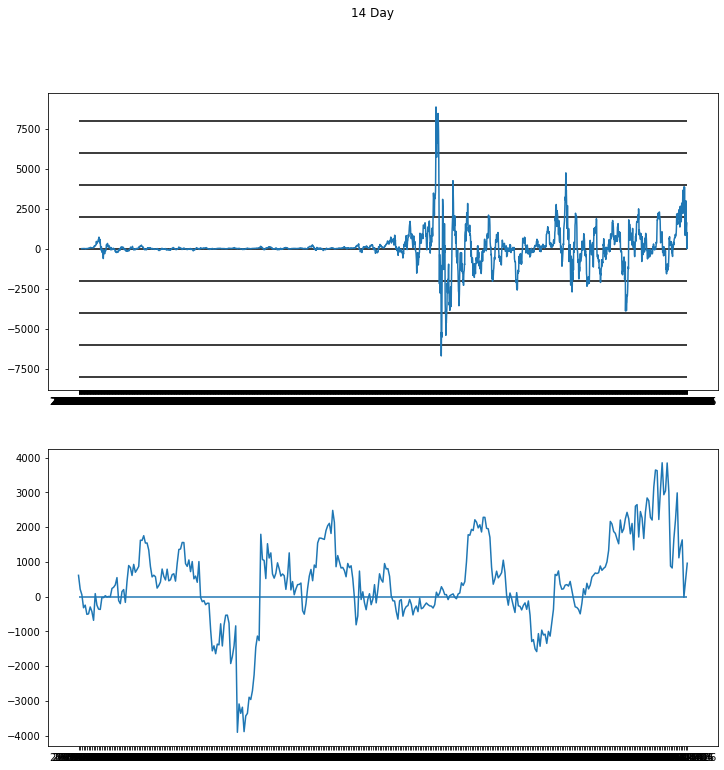

In [7]:
rangenow=dfbitchange['bimonthly_diff'].tail(365).index
valuesnow=dfbitchange['bimonthly_diff'].tail(365).values
rangecrash=dfbitchange['bimonthly_diff'].loc[:].index
valuescrash=dfbitchange['bimonthly_diff'].loc[:].values
plt.rcParams['figure.figsize'] = [12, 12]
fig,axs=plt.subplots(2)
fig.suptitle('14 Day')
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(2000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(4000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(6000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(8000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-2000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-4000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-6000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-8000,rangecrash[0],rangecrash[-1],color='k')
axs[1].plot(rangenow,valuesnow)
axs[1].hlines(0,rangenow[0],rangenow[-1])
plt.show()

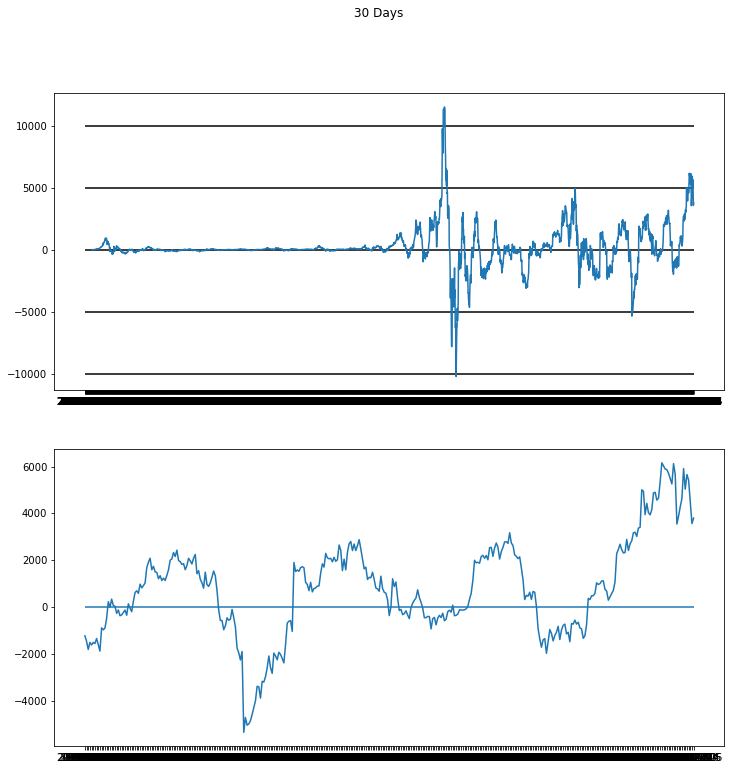

In [8]:
rangenow=dfbitchange['30Days_diff'].tail(365).index
valuesnow=dfbitchange['30Days_diff'].tail(365).values
rangecrash=dfbitchange['30Days_diff'].loc[:].index
valuescrash=dfbitchange['30Days_diff'].loc[:].values
plt.rcParams['figure.figsize'] = [12, 12]
fig,axs=plt.subplots(2)
fig.suptitle('30 Days')
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(5000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(10000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-5000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-10000,rangecrash[0],rangecrash[-1],color='k')
axs[1].plot(rangenow,valuesnow)
axs[1].hlines(0,rangenow[0],rangenow[-1])
plt.show()

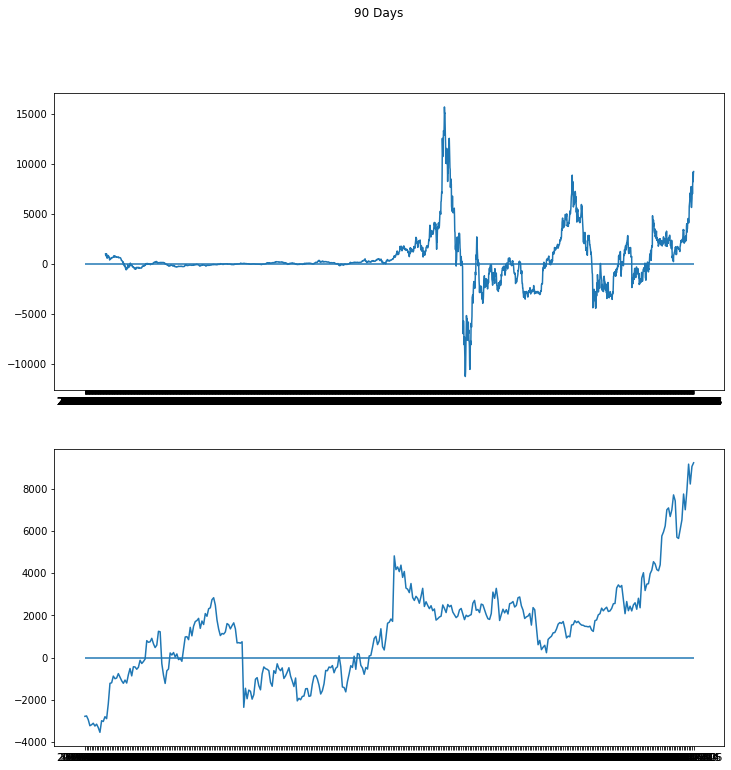

In [9]:
rangenow=dfbitchange['90Days_diff'].tail(365).index
valuesnow=dfbitchange['90Days_diff'].tail(365).values
rangecrash=dfbitchange['90Days_diff'].loc[:].index
valuescrash=dfbitchange['90Days_diff'].loc[:].values
plt.rcParams['figure.figsize'] = [12, 12]
fig,axs=plt.subplots(2)
fig.suptitle('90 Days')
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1])
axs[1].plot(rangenow,valuesnow)
axs[1].hlines(0,rangenow[0],rangenow[-1])
plt.show()

#### 2017

In [10]:
#Daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_daily'].loc['2017'])
plt.title('2017 Daily % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

KeyError: '2017'

In [ ]:
#2017 Daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_30Days'].loc['2017'])
plt.title('2017 30 Day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#2017 Daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_90Days'].loc['2017'])
plt.title('2017 90 Day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

#### 2018

In [ ]:
#2018 Daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_daily'].loc['2018'])
plt.title('2018 Daily Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#2018 30 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_30Days'].loc['2018'])
plt.title('2018 30day Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#2018 90 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_90Days'].loc['2018'])
plt.title('2018 90 day Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

#### 2019

In [ ]:
#2019 Daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_daily'].loc['2019'])
plt.title('2019 Daily Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#2019 30 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_30Days'].loc['2019'])
plt.title('2019 30 Day Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#2019 90 Day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_90Days'].loc['2019'])
plt.title('2019 90 Day Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

##### 2020

In [ ]:
#2020 Daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_daily'].loc['2020'])
plt.title('2020 Daily Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#2020 30 Day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_30Days'].loc['2020'])
plt.title('2020 30 Day Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#2020 90 Day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfbitchange['percent_90Days'].loc['2020'])
plt.title('2020 90 Day Percent Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

### Apple

In [ ]:
import yfinance as yf
symbol='AAPL'
data=yf.Ticker(symbol)
dfapple=data.history(period='1d',start='2017-1-1')
dfapplechange=dfapple[['Close']]

In [ ]:
dfapplechange.columns=['Closing_Price']
dfapplechange['percent_daily']=dfapplechange['Closing_Price'].pct_change(periods=1)
dfapplechange['percent_30Days']=dfapplechange['Closing_Price'].pct_change(periods=30)
dfapplechange['percent_90Days']=dfapplechange['Closing_Price'].pct_change(periods=90)

#### 2017

In [ ]:
#Daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_daily'].loc['2017'])
plt.title('2017 Daily % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#30 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_30Days'].loc['2017'])
plt.title('2017 Daily % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#90 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_90Days'].loc['2017'])
plt.title('2017 Daily % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

#### 2018

In [ ]:
#daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_daily'].loc['2018'])
plt.title('2018 Daily % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#30 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_30Days'].loc['2018'])
plt.title('2018 30day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#90 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_90Days'].loc['2018'])
plt.title('2018 90 day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

#### 2019

In [ ]:
#daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_daily'].loc['2019'])
plt.title('2019 daily % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#30 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_30Days'].loc['2019'])
plt.title('2019 30 day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#90 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_90Days'].loc['2019'])
plt.title('2019 90 day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

#### 2020

In [ ]:
#daily Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_daily'].loc['2020'])
plt.title('2020 daily % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#30 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_30Days'].loc['2020'])
plt.title('2019 30 day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
#90 day Percent Change in Price 
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(dfapplechange['percent_90Days'].loc['2020'])
plt.title('2020 90 day % Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

In [ ]:
import yfinance as yf
symbol='GOOGL'
data=yf.Ticker(symbol)
dfgoogle=data.history(period='1d',start='2017-1-1')
dfgooglechange=dfgoogle[['Close']]
dfgooglechange.columns=['Closing_Price']
dfgooglechange['percent_daily']=dfgooglechange['Closing_Price'].pct_change(periods=1)
dfgooglechange['percent_30Days']=dfgooglechange['Closing_Price'].pct_change(periods=30)
dfgooglechange['percent_90Days']=dfgooglechange['Closing_Price'].pct_change(periods=90)

In [ ]:
import yfinance as yf
symbol='FB'
data=yf.Ticker(symbol)
dffacebook=data.history(period='1d',start='2017-1-1')
dffacebookchange=dffacebook[['Close']]
dffacebookchange.columns=['Closing_Price']
dffacebookchange['percent_daily']=dffacebookchange['Closing_Price'].pct_change(periods=1)
dffacebookchange['percent_30Days']=dffacebookchange['Closing_Price'].pct_change(periods=30)
dffacebookchange['percent_90Days']=dffacebookchange['Closing_Price'].pct_change(periods=90)

In [ ]:
bit_daily_change_sum2017=dfbitchange['percent_daily'].loc['2017'].abs().sum()
bit_30day_change_sum2017=dfbitchange['percent_30Days'].loc['2017'].abs().sum()
bit_90day_change_sum2017=dfbitchange['percent_90Days'].loc['2017'].abs().sum()
apple_daily_change_sum2017=dfapplechange['percent_daily'].loc['2017'].abs().sum()
apple_30day_change_sum2017=dfapplechange['percent_30Days'].loc['2017'].abs().sum()
apple_90day_change_sum2017=dfapplechange['percent_90Days'].loc['2017'].abs().sum()
google_daily_change_sum2017=dfgooglechange['percent_daily'].loc['2017'].abs().sum()
google_30day_change_sum2017=dfgooglechange['percent_30Days'].loc['2017'].abs().sum()
google_90day_change_sum2017=dfgooglechange['percent_90Days'].loc['2017'].abs().sum()
facebook_daily_change_sum2017=dffacebookchange['percent_daily'].loc['2017'].abs().sum()
facebook_30day_change_sum2017=dffacebookchange['percent_30Days'].loc['2017'].abs().sum()
facebook_90day_change_sum2017=dffacebookchange['percent_90Days'].loc['2017'].abs().sum()

bit_daily_change_sum2018=dfbitchange['percent_daily'].loc['2018'].abs().sum()
bit_30day_change_sum2018=dfbitchange['percent_30Days'].loc['2018'].abs().sum()
bit_90day_change_sum2018=dfbitchange['percent_90Days'].loc['2018'].abs().sum()
apple_daily_change_sum2018=dfapplechange['percent_daily'].loc['2018'].abs().sum()
apple_30day_change_sum2018=dfapplechange['percent_30Days'].loc['2018'].abs().sum()
apple_90day_change_sum2018=dfapplechange['percent_90Days'].loc['2018'].abs().sum()
google_daily_change_sum2018=dfgooglechange['percent_daily'].loc['2018'].abs().sum()
google_30day_change_sum2018=dfgooglechange['percent_30Days'].loc['2018'].abs().sum()
google_90day_change_sum2018=dfgooglechange['percent_90Days'].loc['2018'].abs().sum()
facebook_daily_change_sum2018=dffacebookchange['percent_daily'].loc['2018'].abs().sum()
facebook_30day_change_sum2018=dffacebookchange['percent_30Days'].loc['2018'].abs().sum()
facebook_90day_change_sum2018=dffacebookchange['percent_90Days'].loc['2018'].abs().sum()

bit_daily_change_sum2019=dfbitchange['percent_daily'].loc['2019'].abs().sum()
bit_30day_change_sum2019=dfbitchange['percent_30Days'].loc['2019'].abs().sum()
bit_90day_change_sum2019=dfbitchange['percent_90Days'].loc['2019'].abs().sum()
apple_daily_change_sum2019=dfapplechange['percent_daily'].loc['2019'].abs().sum()
apple_30day_change_sum2019=dfapplechange['percent_30Days'].loc['2019'].abs().sum()
apple_90day_change_sum2019=dfapplechange['percent_90Days'].loc['2019'].abs().sum()
google_daily_change_sum2019=dfgooglechange['percent_daily'].loc['2019'].abs().sum()
google_30day_change_sum2019=dfgooglechange['percent_30Days'].loc['2019'].abs().sum()
google_90day_change_sum2019=dfgooglechange['percent_90Days'].loc['2019'].abs().sum()
facebook_daily_change_sum2019=dffacebookchange['percent_daily'].loc['2019'].abs().sum()
facebook_30day_change_sum2019=dffacebookchange['percent_30Days'].loc['2019'].abs().sum()
facebook_90day_change_sum2019=dffacebookchange['percent_90Days'].loc['2019'].abs().sum()

bit_daily_change_sum2020=dfbitchange['percent_daily'].loc['2020'].abs().sum()
bit_30day_change_sum2020=dfbitchange['percent_30Days'].loc['2020'].abs().sum()
bit_90day_change_sum2020=dfbitchange['percent_90Days'].loc['2020'].abs().sum()
apple_daily_change_sum2020=dfapplechange['percent_daily'].loc['2020'].abs().sum()
apple_30day_change_sum2020=dfapplechange['percent_30Days'].loc['2020'].abs().sum()
apple_90day_change_sum2020=dfapplechange['percent_90Days'].loc['2020'].abs().sum()
google_daily_change_sum2020=dfgooglechange['percent_daily'].loc['2020'].abs().sum()
google_30day_change_sum2020=dfgooglechange['percent_30Days'].loc['2020'].abs().sum()
google_90day_change_sum2020=dfgooglechange['percent_90Days'].loc['2020'].abs().sum()
facebook_daily_change_sum2020=dffacebookchange['percent_daily'].loc['2020'].abs().sum()
facebook_30day_change_sum2020=dffacebookchange['percent_30Days'].loc['2020'].abs().sum()
facebook_90day_change_sum2020=dffacebookchange['percent_90Days'].loc['2020'].abs().sum()


df_change_BTC2017=pd.DataFrame({'BTC':[bit_daily_change_sum2017,bit_30day_change_sum2017,bit_90day_change_sum2017]},index=['daily','30day','90day'])
df_change_AAPL2017=pd.DataFrame({'AAPL':[apple_daily_change_sum2017,apple_30day_change_sum2017,apple_90day_change_sum2017]},index=['daily','30day','90day'])
df_change_GOOGL2017=pd.DataFrame({'GOOGL':[google_daily_change_sum2017,google_30day_change_sum2017,google_90day_change_sum2017]},index=['daily','30day','90day'])
df_change_FB2017=pd.DataFrame({'FB':[facebook_daily_change_sum2017,facebook_30day_change_sum2017,facebook_90day_change_sum2017]},index=['daily','30day','90day'])
df_change_2017=pd.concat([df_change_BTC2017,df_change_AAPL2017,df_change_GOOGL2017,df_change_FB2017],axis=1)

df_change_BTC2018=pd.DataFrame({'BTC':[bit_daily_change_sum2018,bit_30day_change_sum2018,bit_90day_change_sum2018]},index=['daily','30day','90day'])
df_change_AAPL2018=pd.DataFrame({'AAPL':[apple_daily_change_sum2018,apple_30day_change_sum2018,apple_90day_change_sum2018]},index=['daily','30day','90day'])
df_change_GOOGL2018=pd.DataFrame({'GOOGL':[google_daily_change_sum2018,google_30day_change_sum2018,google_90day_change_sum2018]},index=['daily','30day','90day'])
df_change_FB2018=pd.DataFrame({'FB':[facebook_daily_change_sum2018,facebook_30day_change_sum2018,facebook_90day_change_sum2018]},index=['daily','30day','90day'])
df_change_2018=pd.concat([df_change_BTC2018,df_change_AAPL2018,df_change_GOOGL2018,df_change_FB2018],axis=1)

df_change_BTC2019=pd.DataFrame({'BTC':[bit_daily_change_sum2019,bit_30day_change_sum2019,bit_90day_change_sum2019]},index=['daily','30day','90day'])
df_change_AAPL2019=pd.DataFrame({'AAPL':[apple_daily_change_sum2019,apple_30day_change_sum2019,apple_90day_change_sum2019]},index=['daily','30day','90day'])
df_change_GOOGL2019=pd.DataFrame({'GOOGL':[google_daily_change_sum2019,google_30day_change_sum2019,google_90day_change_sum2019]},index=['daily','30day','90day'])
df_change_FB2019=pd.DataFrame({'FB':[facebook_daily_change_sum2019,facebook_30day_change_sum2019,facebook_90day_change_sum2019]},index=['daily','30day','90day'])
df_change_2019=pd.concat([df_change_BTC2019,df_change_AAPL2019,df_change_GOOGL2019,df_change_FB2019],axis=1)

df_change_BTC2020=pd.DataFrame({'BTC':[bit_daily_change_sum2020,bit_30day_change_sum2020,bit_90day_change_sum2020]},index=['daily','30day','90day'])
df_change_AAPL2020=pd.DataFrame({'AAPL':[apple_daily_change_sum2020,apple_30day_change_sum2020,apple_90day_change_sum2020]},index=['daily','30day','90day'])
df_change_GOOGL2020=pd.DataFrame({'GOOGL':[google_daily_change_sum2020,google_30day_change_sum2020,google_90day_change_sum2020]},index=['daily','30day','90day'])
df_change_FB2020=pd.DataFrame({'FB':[facebook_daily_change_sum2020,facebook_30day_change_sum2020,facebook_90day_change_sum2020]},index=['daily','30day','90day'])
df_change_2020=pd.concat([df_change_BTC2020,df_change_AAPL2020,df_change_GOOGL2020,df_change_FB2020],axis=1)

In [ ]:
df_change_2017

In [ ]:
df_change_2018

In [ ]:
df_change_2019

In [ ]:
df_change_2020